In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
!pip install -U torch==1.4 torchvision==0.5 -f https://download.pytorch.org/whl/cu101/torch_stable.html
import os
from os.path import exists, join, basename, splitext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 753.4 MB 7.2 kB/s 
     |████████████████████████████████| 4.0 MB 53.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.4.0 which is i

In [5]:
git_repo_url = 'https://github.com/MVIG-SJTU/AlphaPose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q {git_repo_url}
  !pip install -q --upgrade gdown
  !pip install -q youtube-dl cython
  !pip install -q -U PyYAML
  !apt-get install -y -q libyaml-dev
  !cd {project_name} && git checkout 7be9809 && python setup.py build develop --user

     |████████████████████████████████| 596 kB 8.9 MB/s 
Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  libyaml-doc
The following NEW packages will be installed:
  libyaml-dev
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 55.7 kB of archives.
After this operation, 246 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libyaml-dev amd64 0.1.7-2ubuntu3 [55.7 kB]
Fetched 55.7 kB in 0s (198 kB/s)
Selecting previously unselected package libyaml-dev:amd64.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../libyaml-dev_0.1.7-2ubuntu3_amd64.deb ...
Unpacking libyaml-dev:amd64 (0.1.7-2ubuntu3) ...
Setting up libyaml-dev:amd64 (0.1.7-2ubuntu3) ...
Note: checking out '7be9809'.

You are

In [6]:
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [7]:
yolo_pretrained_model_path = join(project_name, 'detector/yolo/data/yolov3-spp.weights')
if not exists(yolo_pretrained_model_path):
  # download the YOLO weights
  !mkdir -p {project_name}/detector/yolo/data
  !gdown -O {yolo_pretrained_model_path} https://drive.google.com/uc?id=1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC

Downloading...
From: https://drive.google.com/uc?id=1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC
To: /content/AlphaPose/detector/yolo/data/yolov3-spp.weights
100% 252M/252M [00:04<00:00, 54.9MB/s]


In [8]:
# ResNet152 backbone 73.3 AP
pretrained_model_path = join(project_name, 'pretrained_models/fast_421_res152_256x192.pth')
pretrained_model_config_path = join(project_name, 'configs/coco/resnet/256x192_res152_lr1e-3_1x-duc.yaml')
if not exists(pretrained_model_path):
  # download the pretrained model
  !gdown -O {pretrained_model_path} https://drive.google.com/uc?id=1kfyedqyn8exjbbNmYq8XGd2EooQjPtF9

Downloading...
From: https://drive.google.com/uc?id=1kfyedqyn8exjbbNmYq8XGd2EooQjPtF9
To: /content/AlphaPose/pretrained_models/fast_421_res152_256x192.pth
100% 334M/334M [00:03<00:00, 92.9MB/s]


In [9]:
!rm -rf AlphaPose_video.avi

In [10]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

! mkdir /content/AlphaPose/detector/yolo/data
file_id = '1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('/content/AlphaPose/detector/yolo/data/yolov3-spp.weights')

! mkdir /content/AlphaPose/detector/tracker/data
file_id = '1nlnuYfGNuHWZztQHXwVZSL_FvfE551pA'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('/content/AlphaPose/detector/tracker/data/JDE-1088x608-uncertainty')

file_id = '1kQhnMRURFiy7NsdS8EFL-8vtqEXOgECn'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('/content/AlphaPose/pretrained_models/fast_res50_256x192.pth')


mkdir: cannot create directory ‘/content/AlphaPose/detector/yolo/data’: File exists


In [ ]:
path_to_video='test_2.mp4'
path_to_output='/content/output_1.mp4'

In [12]:
os.chdir('/content/AlphaPose')

In [13]:
!rm -rf AlphaPose_video.avi video.mp4

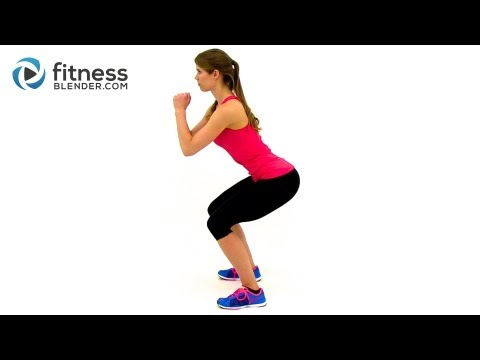

In [1]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("mGvzVjuY8SY", width=500)
display(video)

In [2]:
!pip install youtube-dl
!youtube-dl https://www.youtube.com/watch?v=mGvzVjuY8SY -f 22 -o video_.mp4
!mkdir test
!ffmpeg -i video_.mp4 -ss 00:00:47 -t 10 -c:v copy test/video-clip.mp4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 9.1 MB/s 
[youtube] mGvzVjuY8SY: Downloading webpage
[download] Destination: video_.mp4
[download] 100% of 50.07MiB in 11:05
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable

In [14]:
!python3 scripts/demo_inference.py --sp --video video-clip.mp4 --outdir ../ --save_video --checkpoint ../{pretrained_model_path} --cfg ../{pretrained_model_config_path}

Load SE Resnet...
Loading YOLO model..
Network successfully loaded
Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth
100% 230M/230M [00:10<00:00, 24.1MB/s]
Loading pose model from ../AlphaPose/pretrained_models/fast_421_res152_256x192.pth...
Could not find encoder for codec id 27: Encoder not found
  0% 0/271 [00:00<?, ?it/s]Try to use other video encoders...
100% 271/271 [00:09<00:00, 27.64it/s]
===========================> Finish Model Running.
===========================> Rendering remaining images in the queue...
===========================> If this step takes too long, you can enable the --vis_fast flag to use fast rendering (real-time).
===========================> Rendering remaining 135 images in the queue...
===========================> Rendering remaining 110 images in the queue...
===========================> Rendering remaining 85 images in the queue...
===========================> Rendering re

In [15]:
!ffmpeg -i examples/res/AlphaPose_video-clip.mp4 -t 5 -c copy ../output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib